In [19]:
import csv
import pip
from gensim import corpora, models, similarities
import pandas as pd
import numpy as np
train_file = "train.csv"
df = pd.read_csv(train_file, index_col="id")
# df

In [2]:
import matplotlib.pylab as plt

In [3]:
questions = dict()

for row in df.iterrows():
    questions[row[1]['qid1']] = row[1]['question1']
    questions[row[1]['qid2']] = row[1]['question2']

In [4]:
import re
import nltk
def basic_cleaning(string):
    string = str(string)
    try:
        string = string.decode('unicode-escape')
    except Exception:
        pass
    string = string.lower()
    string = re.sub(' +', ' ', string)
    return string
sentences = []
for i in questions:
    sentences.append(nltk.word_tokenize(basic_cleaning(questions[i])))

In [5]:
import gensim
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

In [6]:
tf = dict()
docf = dict()
total_docs = 0
for qid in questions:
    total_docs += 1
    toks = nltk.word_tokenize(basic_cleaning(questions[qid]))
    uniq_toks = set(toks)
    for i in toks:
        if i not in tf:
            tf[i] = 1
        else:
            tf[i] += 1
    for i in uniq_toks:
        if i not in docf:
            docf[i] = 1
        else:
            docf[i] += 1

In [7]:
from __future__ import division
import math
def idf(word):
    return 1 - math.sqrt(docf[word]/total_docs)

In [8]:
import re
import nltk
def basic_cleaning(string):
    string = str(string)
    string = string.lower()
    string = re.sub('[0-9\(\)\!\^\%\$\'\"\.;,-\?\{\}\[\]\\/]', ' ', string)
    string = ' '.join([i for i in string.split() if i not in ["a", "and", "of", "the", "to", "on", "in", "at", "is"]])
    string = re.sub(' +', ' ', string)
    return string

In [9]:
def w2v_sim(w1, w2):
    try:
        return model.similarity(w1, w2)*idf(w1)*idf(w2)
    except Exception:
        return 0.0

Q1: What is the step by step guide to invest in share market in india?
Q2: What is the step by step guide to invest in share market?
Duplicate: 0


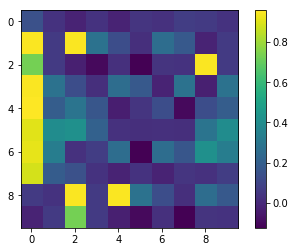

Q1: What is the story of Kohinoor (Koh-i-Noor) Diamond?
Q2: What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
Duplicate: 0


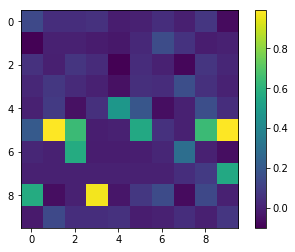

Q1: How can I increase the speed of my internet connection while using a VPN?
Q2: How can Internet speed be increased by hacking through DNS?
Duplicate: 0


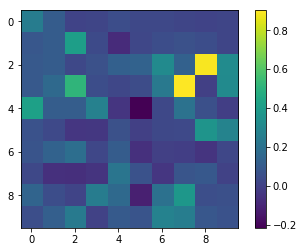

Q1: Why am I mentally very lonely? How can I solve it?
Q2: Find the remainder when [math]23^{24}[/math] is divided by 24,23?
Duplicate: 0


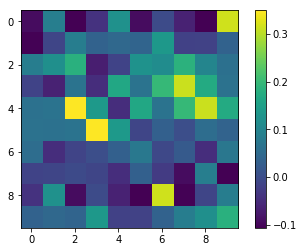

Q1: Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Q2: Which fish would survive in salt water?
Duplicate: 0


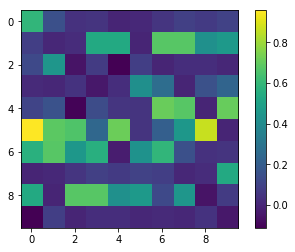

Q1: Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
Q2: I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
Duplicate: 1


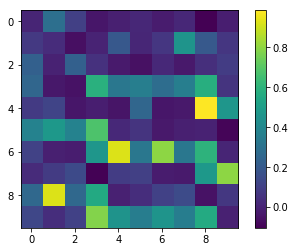

Q1: Should I buy tiago?
Q2: What keeps childern active and far from phone and video games?
Duplicate: 0


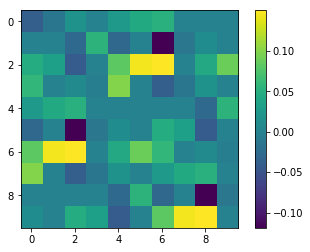

Q1: How can I be a good geologist?
Q2: What should I do to be a great geologist?
Duplicate: 1


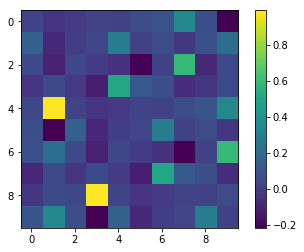

Q1: When do you use シ instead of し?
Q2: When do you use "&" instead of "and"?
Duplicate: 0


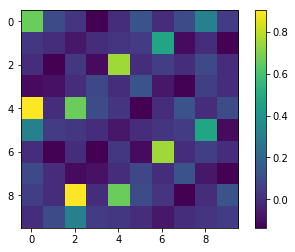

Q1: Motorola (company): Can I hack my Charter Motorolla DCX3400?
Q2: How do I hack Motorola DCX3400 for free internet?
Duplicate: 0


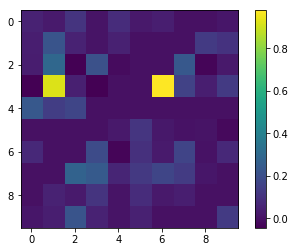

Q1: Method to find separation of slits using fresnel biprism?
Q2: What are some of the things technicians can tell about the durability and reliability of Laptops and its components?
Duplicate: 0


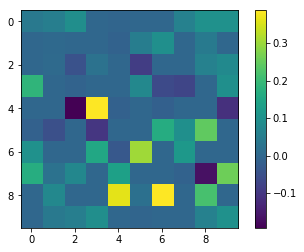

Q1: How do I read and find my YouTube comments?
Q2: How can I see all my Youtube comments?
Duplicate: 1


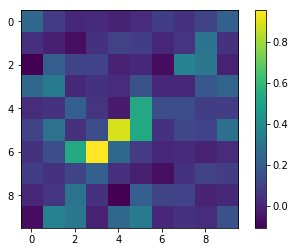

Q1: What can make Physics easy to learn?
Q2: How can you make physics easy to learn?
Duplicate: 1


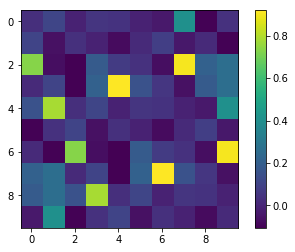

Q1: What was your first sexual experience like?
Q2: What was your first sexual experience?
Duplicate: 1


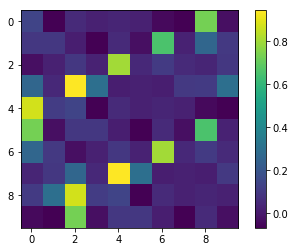

Q1: What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?
Q2: What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan?
Duplicate: 0


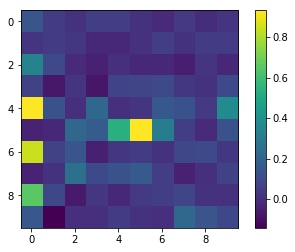

Q1: What would a Trump presidency mean for current international master’s students on an F1 visa?
Q2: How will a Trump presidency affect the students presently in US or planning to study in US?
Duplicate: 1


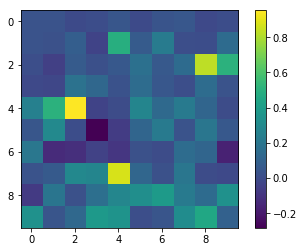

Q1: What does manipulation mean?
Q2: What does manipulation means?
Duplicate: 1


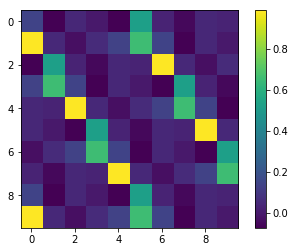

Q1: Why do girls want to be friends with the guy they reject?
Q2: How do guys feel after rejecting a girl?
Duplicate: 0


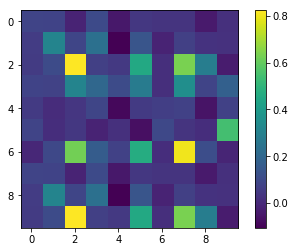

Q1: Why are so many Quora users posting questions that are readily answered on Google?
Q2: Why do people ask Quora questions which can be answered easily by Google?
Duplicate: 1


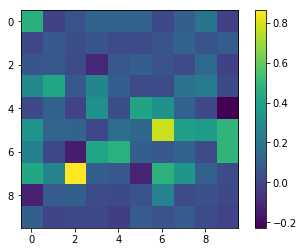

Q1: Which is the best digital marketing institution in banglore?
Q2: Which is the best digital marketing institute in Pune?
Duplicate: 0


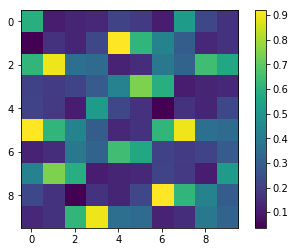

Q1: Why do rockets look white?
Q2: Why are rockets and boosters painted white?
Duplicate: 1


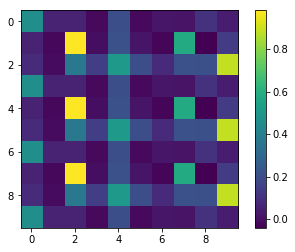

Q1: What's causing someone to be jealous?
Q2: What can I do to avoid being jealous of someone?
Duplicate: 0


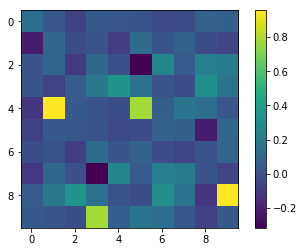

Q1: What are the questions should not ask on Quora?
Q2: Which question should I ask on Quora?
Duplicate: 0


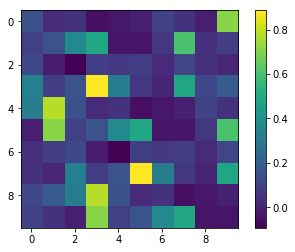

Q1: How much is 30 kV in HP?
Q2: Where can I find a conversion chart for CC to horsepower?
Duplicate: 0


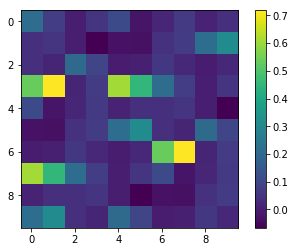

Q1: What does it mean that every time I look at the clock the numbers are the same?
Q2: How many times a day do a clock’s hands overlap?
Duplicate: 0


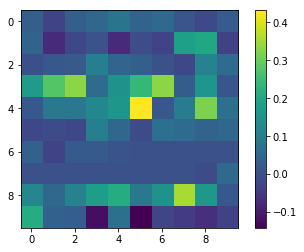

Q1: What are some tips on making it through the job interview process at Medicines?
Q2: What are some tips on making it through the job interview process at Foundation Medicine?
Duplicate: 0


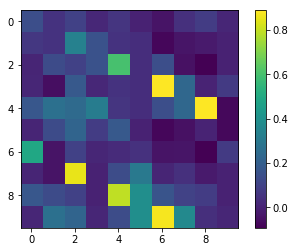

Q1: What is web application?
Q2: What is the web application framework?
Duplicate: 0


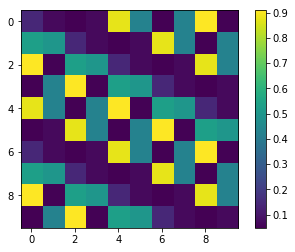

Q1: Does society place too much importance on sports?
Q2: How do sports contribute to the society?
Duplicate: 0


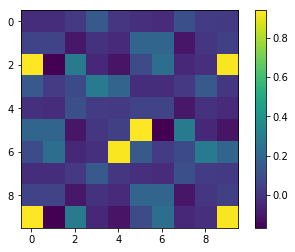

Q1: What is best way to make money online?
Q2: What is best way to ask for money online?
Duplicate: 0


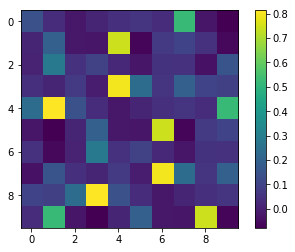

Q1: How should I prepare for CA final law?
Q2: How one should know that he/she completely prepare for CA final exam?
Duplicate: 1


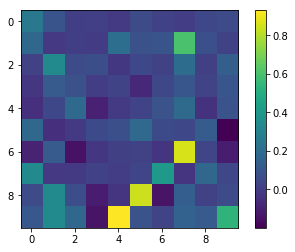

Q1: What's one thing you would like to do better?
Q2: What's one thing you do despite knowing better?
Duplicate: 0


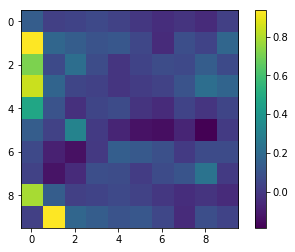

Q1: What are some special cares for someone with a nose that gets stuffy during the night?
Q2: How can I keep my nose from getting stuffy at night?
Duplicate: 1


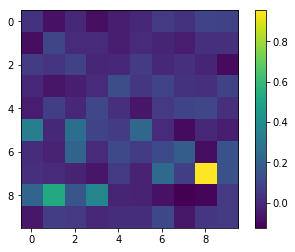

Q1: What Game of Thrones villain would be the most likely to give you mercy?
Q2: What Game of Thrones villain would you most like to be at the mercy of?
Duplicate: 1


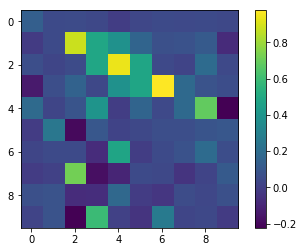

Q1: Does the United States government still blacklist (employment, etc.) some United States citizens because their political views?
Q2: How is the average speed of gas molecules determined?
Duplicate: 0


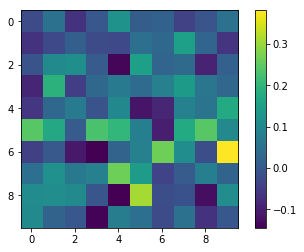

Q1: What is the best travel website in spain?
Q2: What is the best travel website?
Duplicate: 0


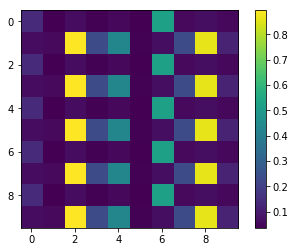

Q1: Why do some people think Obama will try to take their guns away?
Q2: Has there been a gun control initiative to take away guns people already own?
Duplicate: 0


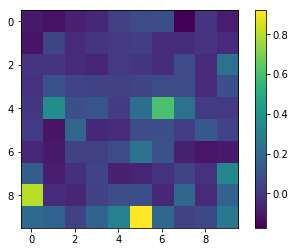

Q1: I'm a 19-year-old. How can I improve my skills or what should I do to become an entrepreneur in the next few years?
Q2: I am a 19 year old guy. How can I become a billionaire in the next 10 years?
Duplicate: 0


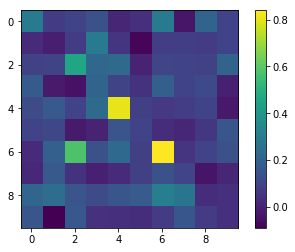

Q1: When a girlfriend asks her boyfriend "Why did you choose me? What makes you want to be with me?", what should one reply to her?
Q2: My girlfriend said that we should end this because she is confused about her feelings for me. I wished her well and disconnected. Should I call her and ask her if she wants to get back together?
Duplicate: 0


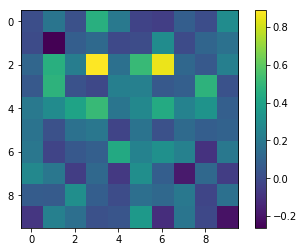

Q1: How do we prepare for UPSC?
Q2: How do I prepare for civil service?
Duplicate: 1


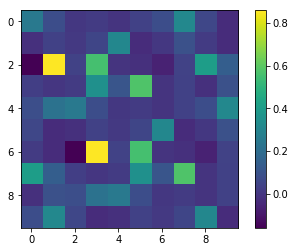

Q1: What is the stall speed and AOA of an f-14 with wings fully swept back?
Q2: Why did aircraft stop using variable-sweep wings, like those on an F-14?
Duplicate: 0


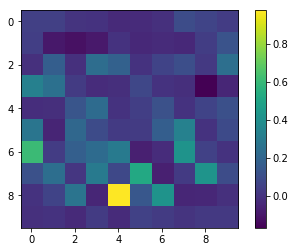

Q1: Why do Slavs squat?
Q2: Will squats make my legs thicker?
Duplicate: 0


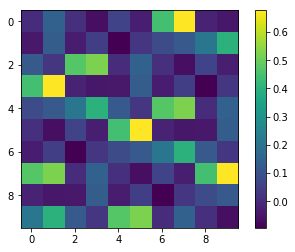

Q1: When can I expect my Cognizant confirmation mail?
Q2: When can I expect Cognizant confirmation mail?
Duplicate: 0


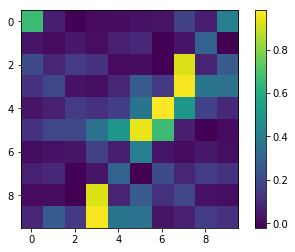

Q1: Can I make 50,000 a month by day trading?
Q2: Can I make 30,000 a month by day trading?
Duplicate: 0


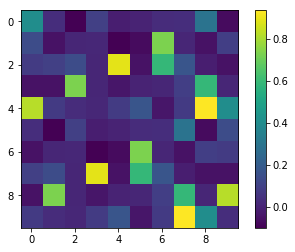

Q1: Is being a good kid and not being a rebel worth it in the long run?
Q2: Is being bored good for a kid?
Duplicate: 0


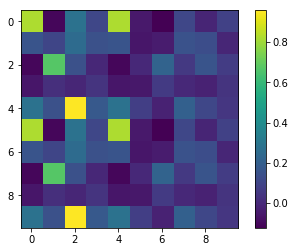

Q1: What universities does Rexnord recruit new grads from? What majors are they looking for?
Q2: What universities does B&G Foods recruit new grads from? What majors are they looking for?
Duplicate: 0


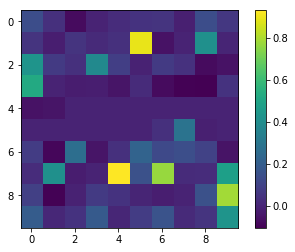

Q1: What is the quickest way to increase Instagram followers?
Q2: How can we increase our number of Instagram followers?
Duplicate: 0


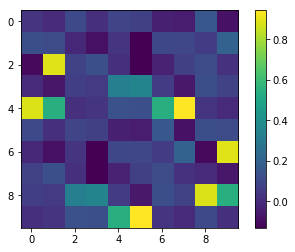

Q1: How did Darth Vader fought Darth Maul in Star Wars Legends?
Q2: Does Quora have a character limit for profile descriptions?
Duplicate: 0


KeyboardInterrupt: 

In [21]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.cm as cm
from scipy import *
# df = df.sample(n=30000)
def imagify(row):
    s1 = row['question1']
    s2 = row['question2']
    t1 = list((basic_cleaning(s1)).split())
    t2 = list((basic_cleaning(s2)).split())
    print("Q1: "+ s1)
    print("Q2: "+ s2)
    print("Duplicate: " + str(row['is_duplicate']))
    
    img = [[w2v_sim(x, y) for x in t1] for y in t2] 
    a = np.array(img, order='C')
    img = np.resize(a,(10,10))
    # print img
    fig = plt.figure()
    # tell imshow about color map so that only set colors are used
    image = plt.imshow(img,interpolation='nearest')
    # make a color bar
    plt.colorbar(image)
    plt.show()
s = df
plt.close()
s.apply(imagify, axis=1, raw=True)

Q1: What is the best bet to make in roulette?
Q2: What is the best betting strategy for roulette?
Duplicate: 0


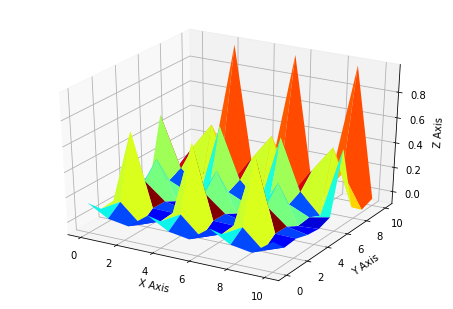

Q1: What is the best coaching center in Delhi for IIT JAM physics?
Q2: What is the best IIT JAM coaching center for chemistry in Delhi?
Duplicate: 0


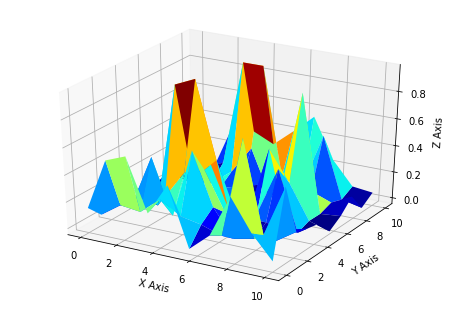

Q1: What are some good ways to introduce our scavenger hunt company to fraternities and sororities?
Q2: What is it like to live in a sorority house?
Duplicate: 0


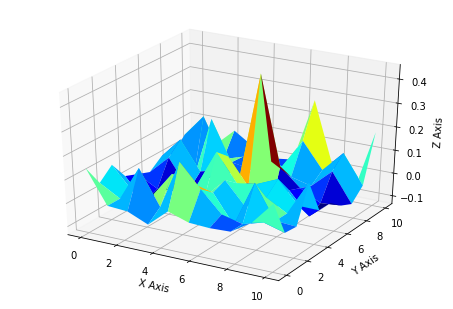

id
89512     None
279229    None
239779    None
dtype: object

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from numpy import *

plt.close()
def surface(row):
    s1 = row['question1']
    s2 = row['question2']
    t1 = list((basic_cleaning(s1)).split())
    t2 = list((basic_cleaning(s2)).split())
    print("Q1: "+ s1)
    print("Q2: "+ s2)
    print("Duplicate: " + str(row['is_duplicate']))
    
#     img = [[w2v_sim(x, y) for x in t1] for y in t2] 

    fig = plt.figure()
    ax = Axes3D(fig)
    X = linspace(0,10,10)
    Y = linspace(0,10,10)
    X, Y = meshgrid(X, Y)
    Z = [[w2v_sim(x, y) for x in t1] for y in t2] 
    a = np.array(Z, order='C')
    Z = np.resize(a,(10,10))
    
    ax.plot_surface(Y, X, Z, rstride=1, cstride=1, cmap=cm.jet)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.show()
    
s = df.sample(n=3)
plt.close()
s.apply(surface, axis=1, raw=True)

In [ ]:
def img_feature(row):
    s1 = row['question1']
    s2 = row['question2']
    t1 = list((basic_cleaning(s1)).split())
    t2 = list((basic_cleaning(s2)).split())
    Z = [[w2v_sim(x, y) for x in t1] for y in t2] 
    a = np.array(Z, order='C')
    return [np.resize(a,(10,10)).flatten()]
s = df

img = s.apply(img_feature, axis=1, raw=True)
pix_col = [[] for y in range(100)] 
for k in img.iteritems():
        for f in range(len(list(k[1][0]))):
           pix_col[f].append(k[1][0][f])

In [23]:
from nltk.corpus import stopwords
from __future__ import division
stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

train_word_match = df.apply(word_match_share, axis=1, raw=True)

In [24]:
from __future__ import division
x_train = pd.DataFrame()

for g in range(len(pix_col)):
    x_train['img'+str(g)] = pix_col[g]

    
x_train['word_match'] = train_word_match

y_train = s['is_duplicate'].values

In [30]:
xt = np.array(x_train.iloc[:,0:100])

np.savetxt('punsurface_train.csv',xt, delimiter=",", fmt='%.5f')

In [16]:
s

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
49727,88478,88479,Doms and Subs: What is it like to have a BDSM ...,"What is it like to be in a BDSM relationship, ...",1
172109,265825,265826,Will there be booze in the Sunburn Daman festi...,How much would it cost to attend the Sunburn F...,0
150154,236382,236383,How much powerful a human mind can be?,How can the human mind be powerful?,1
88094,103946,10009,How widely accepted are credit cards at small ...,How widely accepted are credit cards at small ...,0
189811,288691,288692,What is the deal with Trump's hair?,What's up with Donald Trump's hair?,1
306795,430394,30436,What's an insurance broker's salary?,What does an insurance broker do?,0
355988,352233,485241,How cool were you in high school?,How do I become cool in high school?,0
263483,380043,380044,How many people could become millionaires this...,"Starting with nothing at all, how many years d...",0
84862,46021,57663,Has the Ancient Khmer Empire been scientifical...,Has Ancient Japan been scientifically tested?,1
